
### Lab2 Homework  
Yile Wang  
yxw190015  
02/02/2023 

## Section 6.9 Degree:
1. _Q: identify an example type of network of when it's a good thing to be a high degree node and an example of when it is a bad thing to be a high degree node in a network_   
    A: good thing: in a small-scale network, high degree node will be more efficient to distribute information/resource to other nodes. For example, in a lab, everyone needs to report progress to PI, who is the node with high degree. The PI can guide PhD student directly and they can share the resource from other collaborators to their own PhD students. 

    A bad thing: in a giant computer network, if one server has to respond most of users' requests, and it also has to receive information from upper stream, it would be more vulnerable for potential attack, and it may lead to long waiting time to users within the network. 

2. _Q: Describe or draw an example of a network in which a particular node has very few conections but it could be argued that it is a very important node. Justify your reasoning._ 

    A: I will illustrate it with my code below:
    In my graph, `node1` only have one connection to `node2` but it's a very important node since it is the only in-degree for `node2`. The `node2` itself is a high degree node. Without input from `node1`, `node2` may be shut down. It could be understood as the **Engine** for a car. All the other nodes are dependent on the "engine" `node1`.

In [1]:
import networkx as nx
import numpy as np
import sys
sys.path.append("../d3networkx/")
import d3networkx as d3nx
from d3graph import D3Graph, D3DiGraph
from numpy import *
from time import time
import asyncio
from typing import Tuple
import matplotlib.pyplot as plt

def square_grid(n,d3,G,x0=100,y0=100,w=50):
    if G is None:
        G = D3Graph()
    # find the dimensions for the grid that are as close as possible
    num_rows = int(floor(sqrt(n)))
    while n % num_rows != 0:
        num_rows += 1
    num_cols = int(n/num_rows)
    
    # Add all the nodes
    G.add_nodes_from(range(n))
        
    # Add the edges and position the nodes
    for i in range(num_rows):
        for j in range(num_cols):
            n = num_cols*i + j
            d3.position_node(n,x0+i*w,y0+j*w)
            if i < num_rows-1:
                G.add_edge(n,n+num_cols) # add edge down
            if j < num_cols-1:
                G.add_edge(n,n+1) # add edge right

async def propagate(G,d3,x,steps,slp=0.5,keep_highlights=False,update_at_end=False):
    interactive = d3.interactive
    d3.set_interactive(False)
    A = nx.adjacency_matrix(G).todense().T  # adjacency matrix
    d3.highlight_nodes_by_index(list(where(x>0)[0]))
    d3.update()
    await asyncio.sleep(slp)
    cum_highlighted = sign(x)
    for i in range(steps): # the brains
        x = sign(dot(A,x)) # the brains
        cum_highlighted = sign(cum_highlighted+x)
        if not update_at_end:
            if not keep_highlights:
                d3.clear_highlights()
            d3.highlight_nodes_by_index(list(where(x>0)[0]))
            d3.update()
            await asyncio.sleep(slp)
    if update_at_end:
        if not keep_highlights:
            d3.clear_highlights()
            d3.highlight_nodes_by_index(list(where(x>0)[0]))
        else:
            d3.highlight_nodes_by_index(list(where(cum_highlighted>0)[0]))
        d3.update()
    d3.set_interactive(interactive)
    if keep_highlights:
        return cum_highlighted
    else:
        return x 

In [2]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (2,3), (2,4), (2,5), (2,6), (3,5), (5,6)])
nx.draw(G, with_labels=True)

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

3. _Q: explain what equation (6.25) means. simpler way to explain what the two summations mean_  
    A: The equation 6.25 is:
    $$k^{in}_i = \sum^n_{j=1}A_{ij}$$
    $$k^{out}_j = \sum^n_{i=1}A_{ij}$$


The meanings of two equations are to count how many edges comes in to the `node_i` and how many edges comes out from `node_i`.


## Section 6.10-11: Paths & Components
1. Write down the adjacency matrix `A`. 
$$
\begin{bmatrix}
   0 & 0 & 0 & 0 & 0 \\
   1 & 0 & 0 & 0 & 0 \\
   1 & 1 & 0 & 0 & 0 \\
   0 & 1 & 1 & 0 & 0 \\
   0 & 0 & 1 & 1 & 0 
\end{bmatrix}
$$
---
2. write down the adjacency matrix wtice and multiply them to get $A^2$  
$$
\begin{bmatrix}
   0 & 0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 & 0 \\
   1 & 0 & 0 & 0 & 0 \\
   2 & 1 & 0 & 0 & 0 \\
   1 & 2 & 1 & 0 & 0
\end{bmatrix}
$$
---
3. _Indicate what each nonzero element of $A^2$ means._  
   A: The meaning of the $A_2$ is to determine if there are edges between two specific nodes, even though they are not directly connected. If they are connected by path, the $A^2$ will be larger than 0.
---
4. _Write down the paths that correspond to these nonzero elements: e.g. 1 -> 3 -> 4_  
   A: Equation 6.29 is 
   $$ N_{ij}^{(2)} = \sum_{k=1}^n A_{ik}A_{kj} = [A^2]_{ij} $$
   Using the equation above, we can know that we are counting the path only have two edges (because it's $A^2$), so we can know there are 
   1. A[3,0]: 0-1-3
   2. A[2,0]: 0-1-2
   3. A[3,0]: 0-2-3 ###A[3,0]=2
   4. A[4,0]: 0-2-4
   5. A[3,1]: 1-2-3
   6. A[4,1]: 1-2-4
   7. A[4,1]: 1-3-4 ### A[4,1]=2
   8. A[4,2]: 2-3-4
---
5. Multiply $Ax$, $A^2x = A(Ax)$, and $A^3x = A(A(Ax))$. What do these resulting column vectors represent?    
   A: $Ax$: $[0 1 1 0 0]^T$; $A^2x$: $[0 0 1 2 1]^T$; $A^3x$: $[0 0 0 1 3]^T$  
   All these column vector represents how many paths from this `x` node to other nodes in the `A`. 
---
6. Do the same for $x=[0,0,1,0,0]^T$ Does the observation generalize?  
   A: $Ax$: $[0 0 0 1 1]^T$; $A^2x$: $[0 0 0 0 1]^T$; $A^3x$: $[0 0 0 0 0]^T$. Definitely the observation can be generalized here. 

In [3]:
### The matrix multiplication for A.
A = np.array([[0,0,0,0,0],[1,0,0,0,0], [1,1,0,0,0], [0,1,1,0,0], [0,0,1,1,0]])
A_square = np.dot(A, A)
print(A_square)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [2 1 0 0 0]
 [1 2 1 0 0]]


In [4]:
d3 = await d3nx.create_d3nx_visualizer()
# d3 = await d3nx.create_d3nx_visualizer(canvas_size=(1000, 800))
d3.port

websocket server started...

7337

networkx connected...visualizer connected...visualizer connected...

### Grid Network

1. _Write down the degrees of the nodes. Pick a way to visualize data._  
    A:  
    1. degree = 2: 4 nodes
    2. degree = 3: 40 nodes
    3. degree = 4: 100 nodes  
    
    <!-- Visualization:
    $$
    \begin{bmatrix}
    2 & 3 & 3 & 3 & 2 \\
    3 & 4 & 4 & 4 & 3 \\
    3 & 4 & 4 & 4 & 3 \\
    3 & 4 & 4 & 4 & 3 \\
    2 & 3 & 3 & 3 & 2 
    \end{bmatrix}
    $$ -->

---
2. _Briefly describe the pattern, why stops, where it does. How could you make the propagation go further._  
    A: The pattern I see is sparse triangle in the lower side of matrix. Why it stops is because the `step` equals to 10. However, the essential part of the code is the `x = np.dot(A,x)` part, because it will update the `x` each iteration to update the highlight nodes in the network. And the `clear_highlight` will erase the previous highlight patterns.

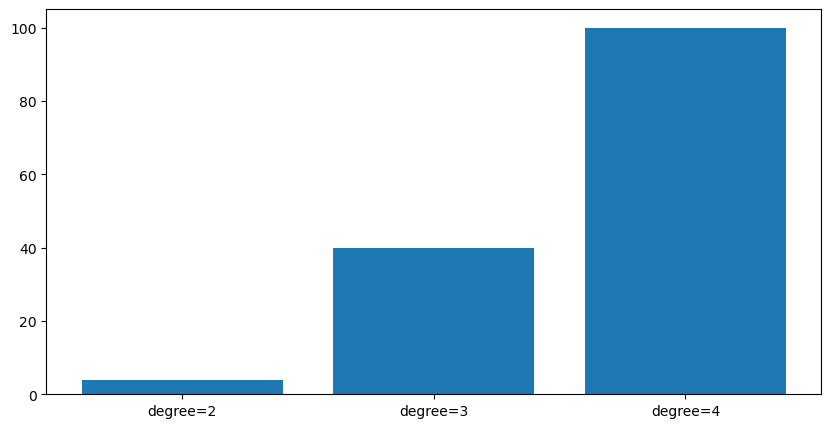

In [5]:
# visualize degree data
  
# creating the dataset
data = {'degree=2':4, 'degree=3':40, 'degree=4':100}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values)
plt.show()

In [6]:
d3.clear()
d3.set_interactive(False)
G = D3Graph()
d3.set_graph(G)
square_grid(144,d3,G,x0=75,y0=70)
d3.update()

In [7]:
# propagate
x = zeros((G.number_of_nodes(),1))
x[0] = 1
await propagate(G,d3,x,10,slp=1);

/tmp/ipykernel_13164/381437306.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense().T  # adjacency matrix


### Directed Graph

1. _Q: End results of propagate?_  
    A: All zeros
---
2. _Q: What's $A^{10}$? Describe why this is network path and also from linear algebra._    
    A: The results of $A^{10}$ is all zeros, which means that there is no any path from node 1 to node 10. From network perspective, node 10 is larger than the total number of nodes, so it is reasonable to have all zeros in the matrix; From linear algebra perspective, the longest connections from first node to the last node is 4 edges, thus, if the $A^r$ over the $A^4$, the matrix will multiply with zeros. In linear algebra, The all zeros matrix is **null matrix**.
---
3. _Q: is the out-component what I predicted?_  
    A: Yes definitely. From the definition of the out-component, out-component is the set of vertices that are reachable via directed paths starting from A, including A. If we choose `0` as the starting vertex, the whole set is the out-component.
---
4. _Q: Without changing the code within the propagate, how we use it to find in-components instead of out-component._  
    A: The definition of the in-component is that a set of vertices from which there is a directed path to A, including A itself. Thus, we only need to reverse the direction (labels) in the network then we can have the in-component.
---
5. _Q: size of the strongly connected component?_  
    A: The largest size of strongly connected component is a fully connected network. The size of the strongly connected componet is `None` in this network.

In [8]:
d3.clear()
G = nx.read_weighted_edgelist('lab2.edgelist', create_using=nx.DiGraph)
G = D3DiGraph(G)
d3.set_graph(G)
d3.update()
x = zeros((G.number_of_nodes(),1))
x[0] = 1
await propagate(G, d3, x, 10, slp=1)

/tmp/ipykernel_13164/381437306.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense().T  # adjacency matrix


matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [9]:
A = nx.adjacency_matrix(G).todense().T  # adjacency matrix
A10 = np.linalg.matrix_power(A, 10)
print(A10)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


/tmp/ipykernel_13164/66316860.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense().T  # adjacency matrix


In [10]:
## Out-component
xx = await propagate(G, d3, x, 20, update_at_end=True, keep_highlights=True)

## In-component
# G = nx.read_weighted_edgelist('lab2.edgelist', create_using=nx.DiGraph)
# G_rev = G.reverse()
# G_rev = D3DiGraph(G_rev)
# d3.set_graph(G_rev)
# d3.update()
# y = await propagate(G_rev, d3, x, 20, update_at_end=True, keep_highlights=True)

/tmp/ipykernel_13164/381437306.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense().T  # adjacency matrix


### E. coli Protein Network

1. _Q: find out the out-components of nodes with index 2 and 16_  
    A: The out-components of nodes are just themselves, which are 2 and 16. The sizes of both are 1.
2. _Q: The minimum of step size to find the whole out-component_  
    A: I think it is `n-1`. 

In [11]:
d3.clear()
G = nx.read_weighted_edgelist('ecoli.edgelist', create_using=nx.DiGraph)
G = D3DiGraph(G)
d3.set_graph(G)
d3.update()
## propagate
x = zeros((G.number_of_nodes(), 1))
x[1] = 1
y = await propagate(G, d3, x, 20, update_at_end=True, keep_highlights=True)
print(sum(y))

1.0


In [12]:
x = zeros((G.number_of_nodes(), 1))
x[15]=1
y = await propagate(G, d3, x, 100, update_at_end=True, keep_highlights=True)
print(sum(y))

1.0


### Function to show all the longest shortest paths
This function below will give us the `REAL` longest shortest paths all in once.
It will return all the path with longest path (5). And highlight all these paths all together in the network.

In [13]:
def diameter_net(network):
    """
    A function to find the longest shortest paths in the network.
    ----------------------
    Parameters:
        network: A D3DiGraph
            The directed network
    Return:
        longest_paths: dict
            All the paths with longest shortest path.
            The keys of the dict is the **end vertex**.
        largest: int
            The length of the paths
    """
    spaths = dict(nx.all_pairs_shortest_path(network))
    keys = list(spaths)
    largest = 0
    for i in keys:
        single_keys = list(spaths[i]) 
        for j in single_keys:
            single_path = spaths[i][j]
            if len(single_path) > largest:
                longest_paths = {}
                longest_paths[j] = single_path
                largest = len(single_path)
            elif len(single_path) ==  largest:
                longest_paths[j] = single_path
    return longest_paths, largest

longest_paths, largest = diameter_net(G)
print(longest_paths)
print(largest)


# a generator helps us to highlight the network
def path_generator(path):
    atuple = []
    for i in range(len(path)-1):
        j = i+1
        new_ele = (path[i], path[j])
        atuple.append(new_ele)
    return atuple

path = path_generator(longest_paths[list(longest_paths)[0]])


d3.clear_highlights()
# highlight the common paths of all the longest shortest path
d3.highlight_edges(path[:-1]) 
d3.highlight_edges(G.edges(longest_paths[list(longest_paths)[0]][-2])) 
# show all the longest shortest paths together
d3.update()


{'133': ['190', '292', '136', '137', '133'], '134': ['190', '292', '136', '137', '134'], '138': ['190', '292', '136', '137', '138'], '139': ['190', '292', '136', '137', '139'], '264': ['190', '292', '136', '137', '264'], '367': ['190', '292', '136', '137', '367'], '381': ['190', '292', '136', '137', '381']}
5


## Section 6.12: Flows && Cut sets
1. _Q: describe these graphs in words_  
    A: The best and worst scenario are presented in the functions `worst` and `best`. Worst scenario has only one edges from `node_1` to `node_n`. The `best` scenario has 500 edges from `node_1` to `node_n`. The minimum cut of `worst` is 1 and the minimum cut of `best` is 500. The `best` scenario also required longer time to cut off. 

In [14]:
def worst_graph(n):
    G = nx.DiGraph()
    halfway = int(n/2)
    G.add_weighted_edges_from([(1, n, 1)])
    for i in range(halfway):
        j = i + halfway
        G.add_edge(i, 1, weight=1)
        G.add_edge(n, j, weight = 1)
    return G

def best_graph(n):
    G = nx.DiGraph()
    halfway = int(n/2)
    G.add_weighted_edges_from([(0, 1, 1)])
    for i in range(halfway):
        j = i + halfway-1
        G.add_edge(1, i, weight=1)
        G.add_edge(i, j, weight = 1)
        G.add_edge(j, n, weight= 1)
    return G    

# perform min cut
n=1000

d3.clear()
worst = worst_graph(n)
G=D3DiGraph(worst)
d3.set_graph(G)
d3.update()

d3.clear()
best = best_graph(n)
G=D3DiGraph(best)
d3.set_graph(G)
d3.update()

# time, worst
start_time = time()
value, _ = nx.minimum_cut(worst, 1, n, capacity='weight')
print(f'The minimum cut of the best network is {value}')
print('min cut took %1.10f seconds' % (time() - start_time))

# time, best
start_time = time()
value, _ = nx.minimum_cut(best, 1, n, capacity='weight')
print(f'The minimum cut of the best network is {value}')
print('min cut took %1.10f seconds' % (time() - start_time))

The minimum cut of the best network is 1
min cut took 0.0204489231 seconds
The minimum cut of the best network is 500
min cut took 0.0629861355 seconds


1. _Q: why this graph should be an acyclic directed graph?_  
    A: Because it will create inifinite death loop if we have cycle in the project. The longest path will be impossible to calculate if we have cycle.
---
2. _Q: potential use-case for analyzing the minimum cut of an activity network._  
    A: 1. The minimum cut could be used as the evaluation of the time saving to achieve some certain goals. In this example, the edges are time usage to achieve next goal, so it would be valuable to know what's the most efficient way to achieve the final goal by wisely choosing the path; 2. When the edge weight is not time usage but other factors (i.e. cost, human resource allocation), it could be useful to help peopeling to optimize their decisions.

In [8]:
G = nx.read_gml('pert.gml','name')

for u, v in G.edges():
    G[u][v]['weight'] = -G[u][v]['weight']

# find longest path
path = nx.bellman_ford_path(G, 'Lead time', 'Leave site', weight='weight')
print(f'The length of the path is {len(path)} and the path is {path}')

# minimum cut
value, _ = nx.minimum_cut(G, 'Lead time', 'Leave site', capacity='weight')
print(f'The minimum cut of the network is {value}')

[('Lead time', 'Move to site'), ('Lead time', 'Obtain pipes'), ('Lead time', 'Obtain valves'), ('Move to site', 'Lay out pipeline'), ('Obtain pipes', 'Prepare valve chambers'), ('Obtain pipes', 'Cut specials'), ('Obtain pipes', 'Lay pipes'), ('Obtain valves', 'Fit valves'), ('Lay out pipeline', 'Dig trench'), ('Dig trench', 'Prepare valve chambers'), ('Dig trench', 'Lay pipes'), ('Prepare valve chambers', 'Fit valves'), ('Cut specials', 'Fit valves'), ('Lay pipes', 'Concrete anchors'), ('Fit valves', 'Finish valve chambers'), ('Fit valves', 'Test pipeline'), ('Concrete anchors', 'Finish valve chambers'), ('Concrete anchors', 'Test pipeline'), ('Concrete anchors', 'Backfill'), ('Finish valve chambers', 'Leave site'), ('Test pipeline', 'Clean up'), ('Backfill', 'Clean up'), ('Clean up', 'Leave site')]
The length of the path is 5 and the path is ['Lead time', 'Obtain valves', 'Fit valves', 'Finish valve chambers', 'Leave site']
The minimum cut of the network is 11.0
